In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def accel(t):
    return np.sin(t)
    # return 1

def rand_accel_bias(sigma_squared=1e-6):
    return np.random.normal(0, np.sqrt(sigma_squared))

def rand_accel_noise(sigma_squared=2.5e-3):
    return np.random.normal(0, np.sqrt(sigma_squared))

In [39]:
Phi = np.array([
    [0, 1],
    [1, 0],
]) # state matrix
# vector is x', v', b'

# B = np.array([
#     [0, 0],
#     [1, 0],
# ])
# vector is a (+ noise), w_b

w_b = 1e-6
zeta = 2.5e-3
Q = np.eye(2) * zeta
P = np.eye(2)
T = 500
dt = 0.01 # 100 Hz

In [40]:
# Kalman filter
x = [0]
actual_x = [0]
v = [0]
actual_v = [0]
a = [0]
actual_a = [0]
bias = [0]
P_1 = [1] # Diagonal terms of P
P_2 = [1]

a_t = a[0]
actual_a_t = actual_a[0]
v_t = v[0]
actual_v_t = actual_v[0]
x_t = x[0]
actual_x_t = actual_x[0]
bias_t = bias[0]
P_t = P.copy()
for _ in range(int(T/dt)):
    bias_t = bias_t + dt*rand_accel_bias()
    new_a_t = accel(_/T)
    a_t = new_a_t + (bias_t + rand_accel_noise())
    actual_a_t = new_a_t
    v_t = v_t + dt*a_t
    actual_v_t = actual_v_t + dt*actual_a_t
    x_t = x_t + dt*v_t
    actual_x_t = actual_x_t + dt*actual_v_t
    # Note we have Phi is [[0, 1],[0,0]] * (x,v)
    # and we have B is [[0],[1]] * (a)
    
    P_t = Phi @ P_t @ Phi.T + Q
    if _ % int(1/dt) == 0:
        x.append(x_t)
        v.append(v_t)
        a.append(a_t)
        bias.append(bias_t)
        
        actual_x.append(actual_x_t)
        actual_v.append(actual_v_t)
        actual_a.append(actual_a_t)
        
        P_1.append(P_t[0,0])
        P_2.append(P_t[1,1])
T
    

500

Text(0.5, 1.0, 'Velocity')

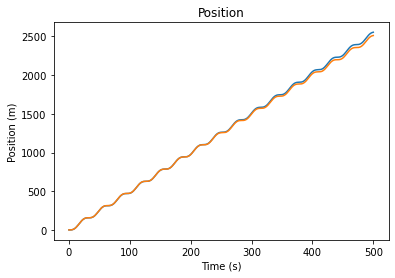

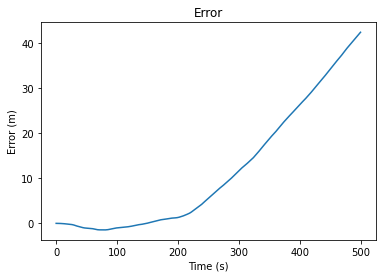

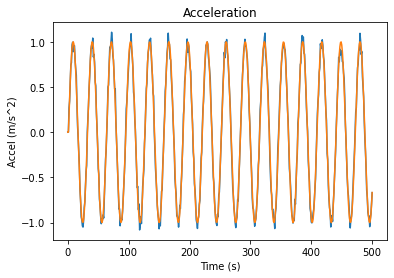

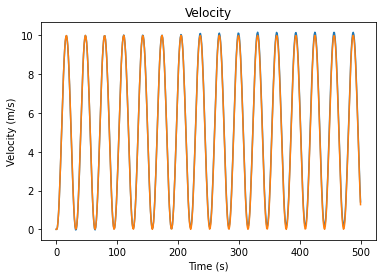

In [41]:
error = np.array(x) - np.array(actual_x)
Tf = np.linspace(0, T, T+1)

plt.figure(1)
plt.plot(Tf, x)
plt.plot(Tf, actual_x)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position")

plt.figure(2)
plt.plot(Tf, error)
plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.title("Error")

plt.figure(3)
plt.plot(Tf, a)
plt.plot(Tf, actual_a)
plt.xlabel("Time (s)")
plt.ylabel("Accel (m/s^2)")
plt.title("Acceleration")

plt.figure(4)
plt.plot(Tf, v)
plt.plot(Tf, actual_v)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity")

Text(0.5, 1.0, '2nd Diagonal Term in P')

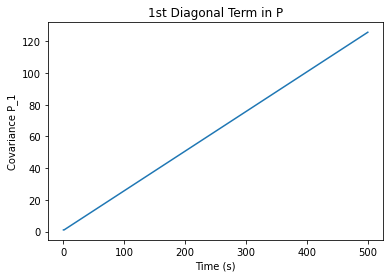

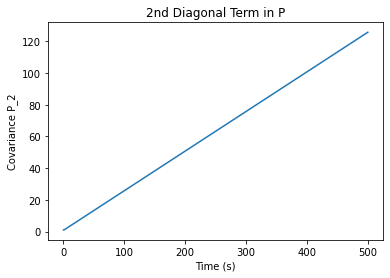

In [42]:
plt.figure(6)
plt.plot(Tf, P_1)
plt.xlabel("Time (s)")
plt.ylabel("Covariance P_1")
plt.title("1st Diagonal Term in P")

plt.figure(7)
plt.plot(Tf, P_2)
plt.xlabel("Time (s)")
plt.ylabel("Covariance P_2")
plt.title("2nd Diagonal Term in P")
